In [101]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [102]:
def read_file(fname):
    img=cv2.imread(fname)
    img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return  img

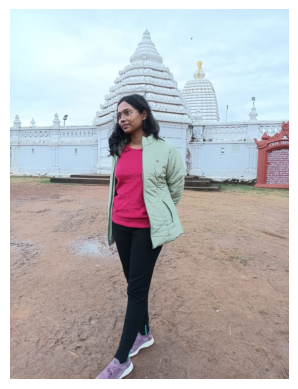

In [114]:
fname="mymy.jpg"
img=read_file(fname)
org_img=np.copy(img)

In [115]:
def edge_mask(img, linesize,blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)

    edges =cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size, blur_value)
    return edges

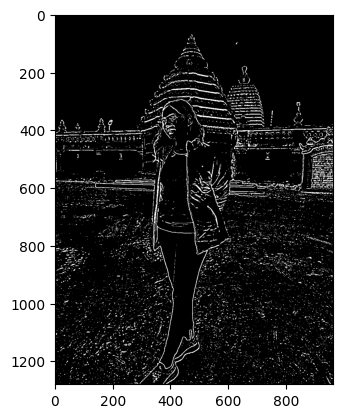

In [116]:
line_size, blur_value=5,5
edges=edge_mask(img,line_size, blur_value)

plt.imshow(edges,cmap="binary")
plt.show()

In [117]:
def color_quantization(img,k):
    data=np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    ret,label,center= cv2.kmeans(data, k, None ,criteria,10 , cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

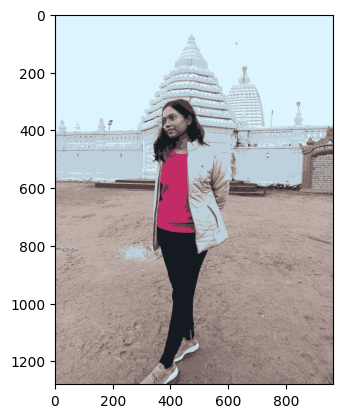

In [118]:
img=color_quantization(img,k=9)
plt.imshow(img)
plt.show()

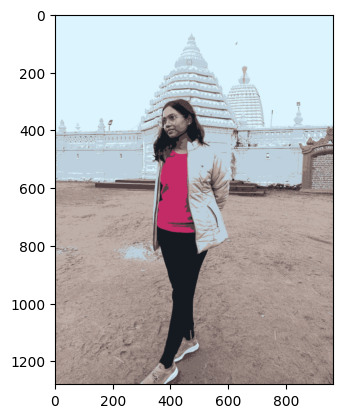

In [119]:
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [ ]:
# Input string from the user
original_string = input("Enter a string: ")

# Reverse the string
reversed_string = original_string[len(original_string):0:-1]

# Display the reversed string
print("Reversed String:", reversed_string)


In [122]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    
    plt.imshow(c)
    plt.axis("off")
    plt.show()

    plt.imshow(org_img)
    plt.axis("off")
    plt.show()

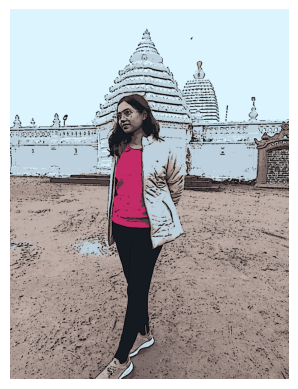

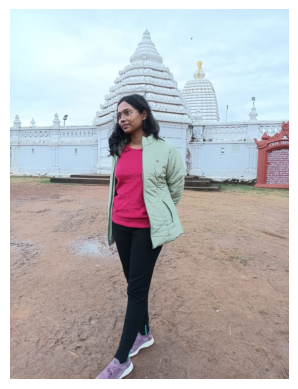

In [123]:
cartoon()